In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

In [2]:
data = pd.read_csv("medical_cost_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
data.shape

(1338, 7)

In [5]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.duplicated().sum()

1

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
for column in data.columns:
    col=data[column].value_counts()
    print(col)
    print()

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

sex
male      675
female    662
Name: count, dtype: int64

bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

smoker
no     1063
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

charges
16884.92400    1
2117.33885     1
2221.56445     1
19

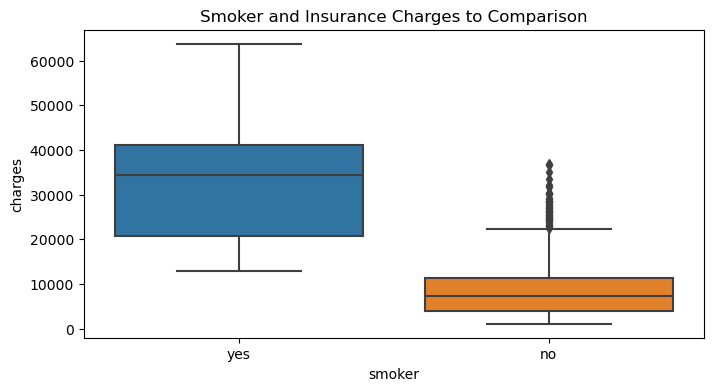

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Smoker and Insurance Charges to Comparison')
plt.show()


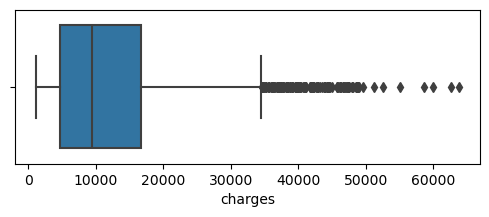

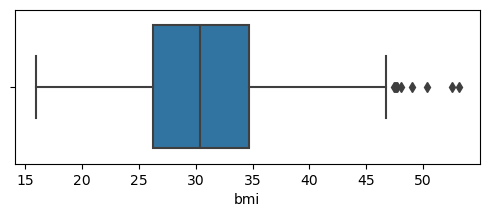

In [13]:
column= ['charges', 'bmi']
for i in column:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=i , data=data)
    plt.show()

Text(0.5, 1.0, 'Count of smokers by gender')

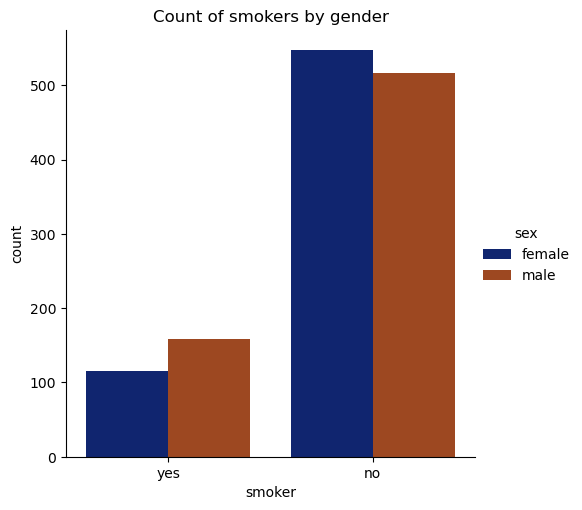

In [14]:
sns.catplot(x="smoker", kind="count", hue = 'sex', palette="dark", data=data)
plt.title("Count of smokers by gender")


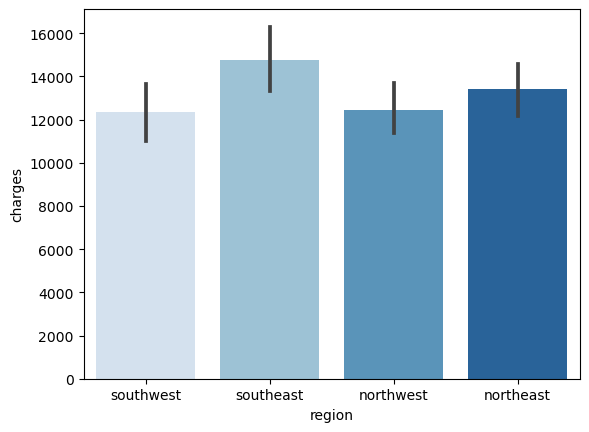

In [15]:
sns.barplot(x='region', y='charges', data= data ,  palette='Blues')
plt.show()

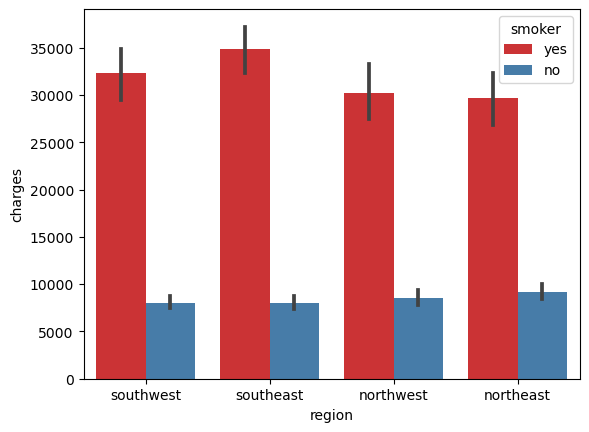

In [16]:
sns.barplot(x='region', y='charges', hue='smoker' ,data= data,  palette='Set1')
plt.show()

In [17]:
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


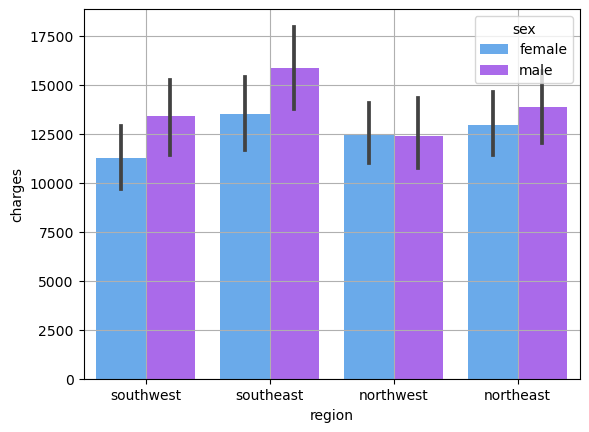

In [18]:
sns.barplot(x='region', y='charges', hue='sex' ,data= data,  palette='cool')
plt.grid()
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder , StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor , RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV


In [20]:
encoder = LabelEncoder()
data['sex'] = encoder.fit_transform(data["sex"])
data['smoker'] = encoder.fit_transform(data["smoker"])
data['region'] = encoder.fit_transform(data["region"])


In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


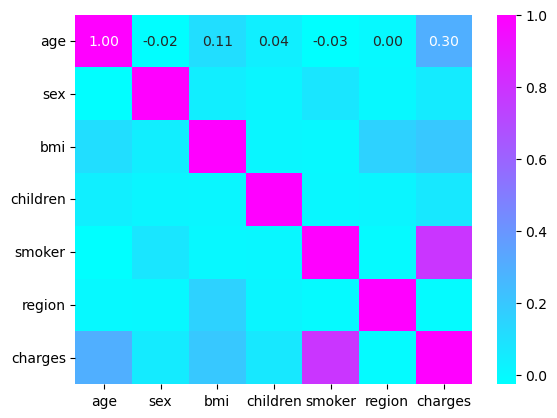

In [22]:
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='cool')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

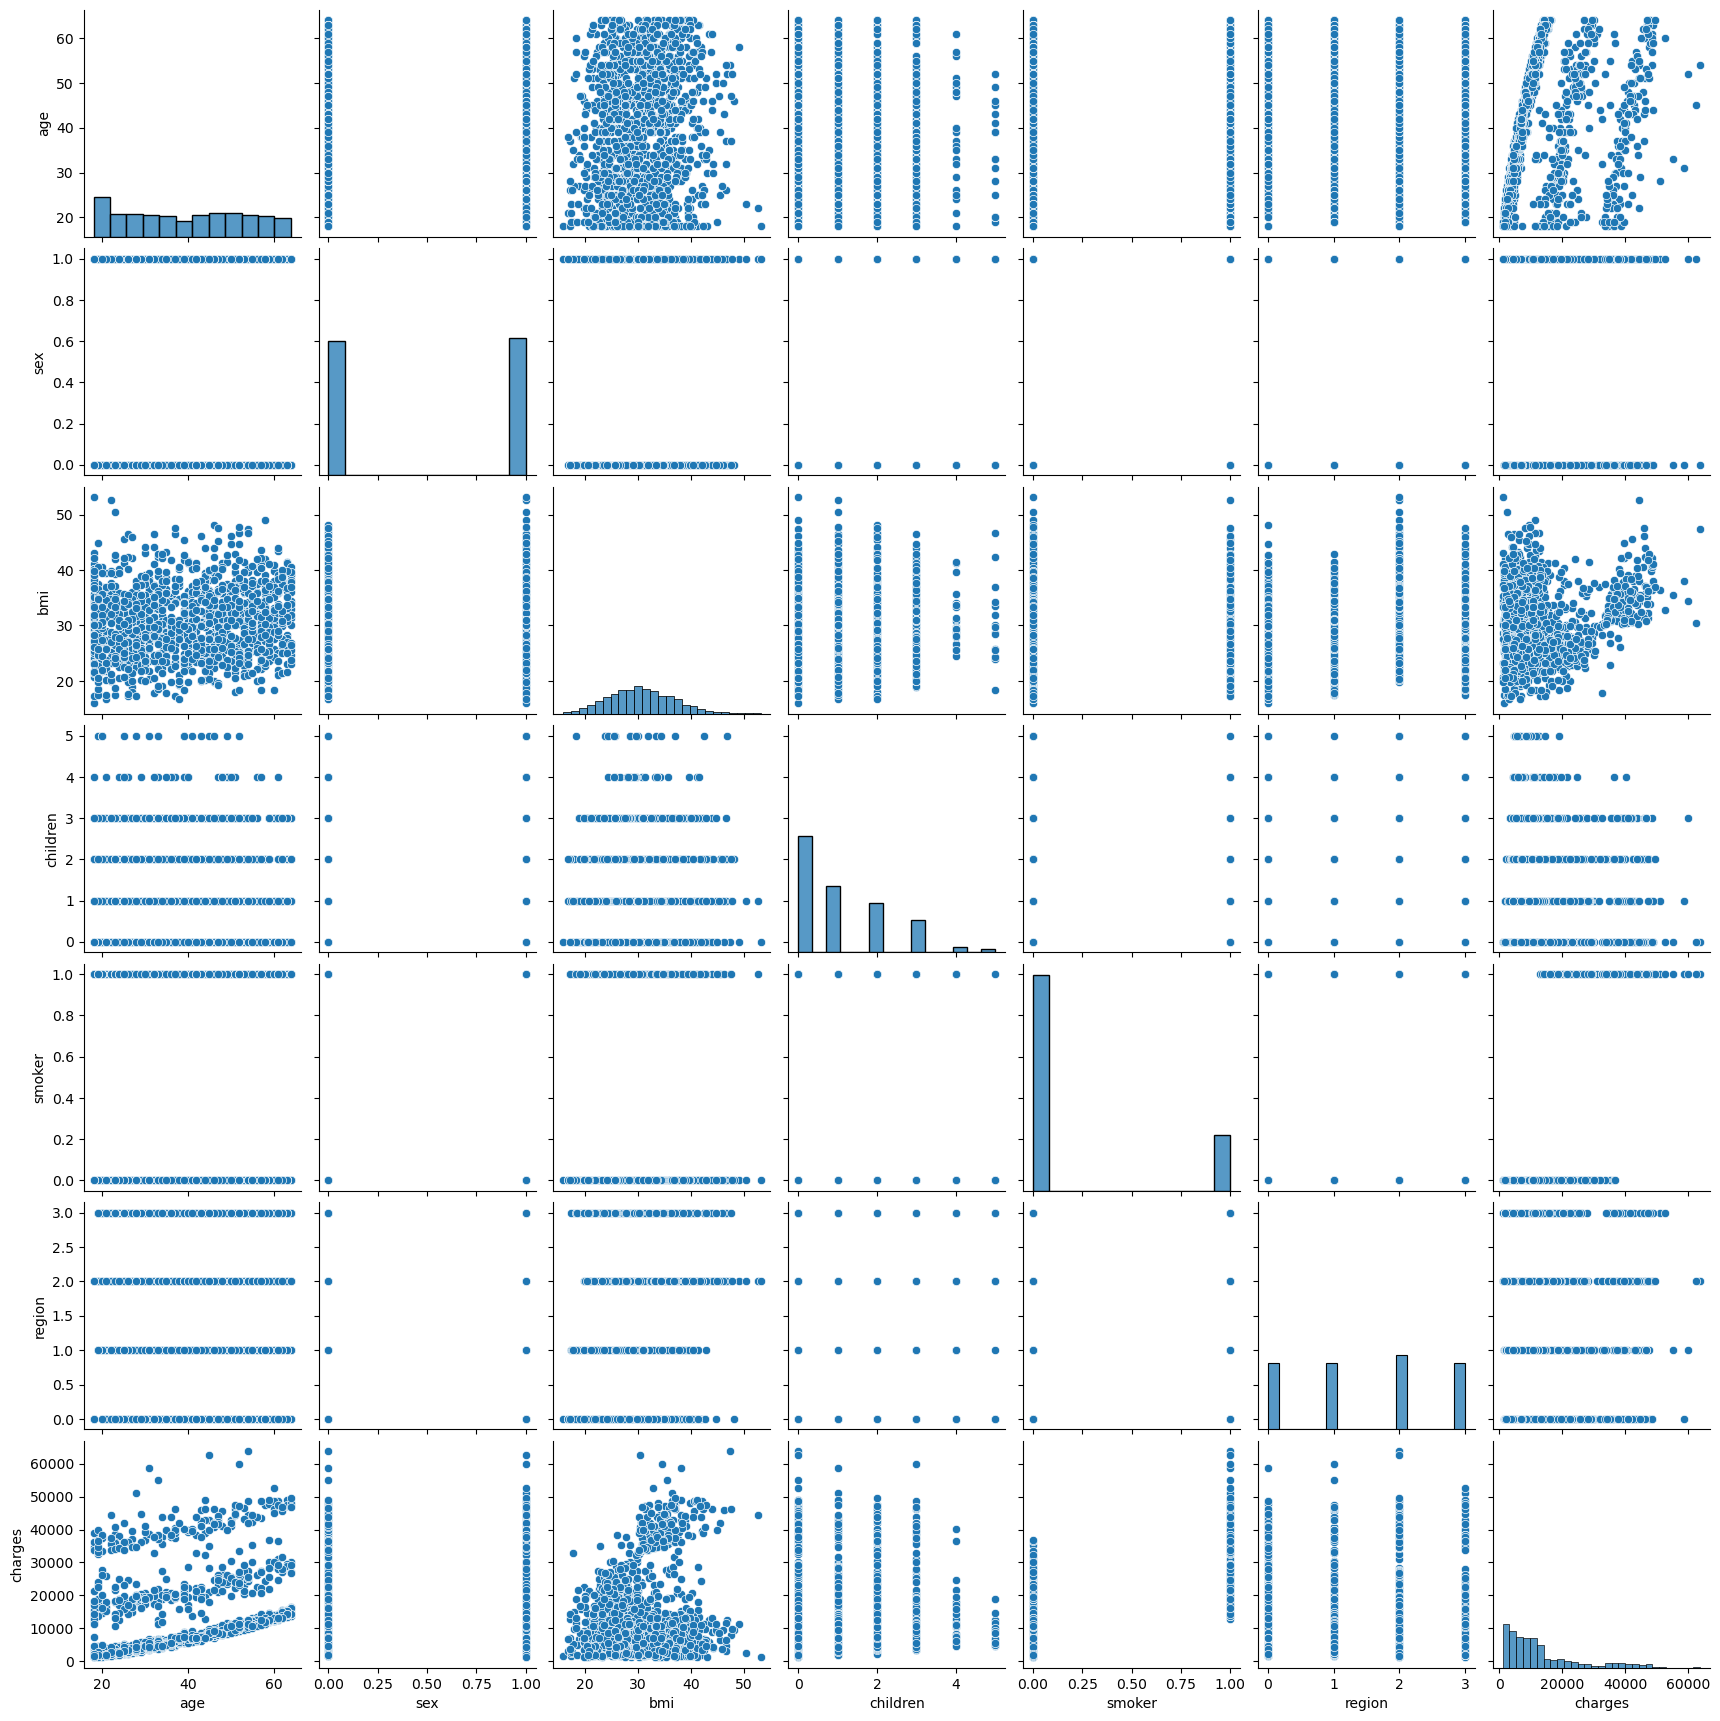

In [23]:
sns.pairplot(data)

In [24]:
x = data.drop(['charges'], axis= True)
y = data['charges']

In [25]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [27]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR= LR.predict(x_test)
pred_train= LR.predict(x_train)
score_LR=LR.score(x_test, y_test)
print(LR)
print()
print('Score is', score_LR)
print('r2_score on training data' , r2_score(y_train, pred_train)*100)
print('mean absolute_error ' , mean_absolute_error(y_test, pred_LR))
print('mean squared_error ' , mean_squared_error(y_test, pred_LR))
print('root mean squired error ', np.sqrt(mean_squared_error(y_test, pred_LR)))



LinearRegression()

Score is 0.8068466322629109
r2_score on training data 72.97182858804965
mean absolute_error  4182.3531552883005
mean squared_error  35493102.61165056
root mean squired error  5957.608799816463


In [28]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
pred_knn= knn.predict(x_test)
pred_train= knn.predict(x_train)
score_knn=knn.score(x_test, y_test)
print(knn)
print()
print('Score is', score_knn)
print('r2_score on training data' , r2_score(y_train, pred_train)*100)
print('mean absolute_error ' , mean_absolute_error(y_test, pred_knn))
print('mean squared_error ' , mean_squared_error(y_test, pred_knn))
print('root mean squired error ', np.sqrt(mean_squared_error(y_test, pred_knn)))


KNeighborsRegressor()

Score is 0.8645295403218781
r2_score on training data 85.86464985217084
mean absolute_error  3102.3946927873135
mean squared_error  24893518.464290127
root mean squired error  4989.340483900665


In [29]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
pred_DT= DT.predict(x_test)
pred_train= DT.predict(x_train)
score_DT= DT.score(x_test, y_test)
print(DT)
print()
print('Score is', score_DT)
print('r2_score on training data' , r2_score(y_train, pred_train)*100)
print('mean absolute_error ' , mean_absolute_error(y_test, pred_DT))
print('mean squared_error ' , mean_squared_error(y_test, pred_DT))
print('root mean squired error ', np.sqrt(mean_squared_error(y_test, pred_DT)))


DecisionTreeRegressor()

Score is 0.7797914641984276
r2_score on training data 100.0
mean absolute_error  2930.9476207798507
mean squared_error  40464653.80715045
root mean squired error  6361.1833653142285


In [30]:
GB = GradientBoostingRegressor()
GB.fit(x_train, y_train)
pred_GB= GB.predict(x_test)
pred_train= GB.predict(x_train)
score_GB= GB.score(x_test, y_test)
print(GB)
print()
print('Score is', score_GB)
print('r2_score on training data' , r2_score(y_train, pred_train)*100)
print('mean absolute_error ' , mean_absolute_error(y_test, pred_GB))
print('mean squared_error ' , mean_squared_error(y_test, pred_GB))
print('root mean squired error ', np.sqrt(mean_squared_error(y_test, pred_GB)))


GradientBoostingRegressor()

Score is 0.8998137513976314
r2_score on training data 89.31701840243524
mean absolute_error  2535.7965488433806
mean squared_error  18409830.714214336
root mean squired error  4290.667863423401


In [31]:
RF = RandomForestRegressor ()
RF.fit(x_train, y_train)
pred_RF= RF.predict(x_test)
pred_train= RF.predict(x_train)
score_RF= RF.score(x_test, y_test)
print(RF)
print()
print('Score is',score_RF)
print('r2_score on training data' , r2_score(y_train, pred_train)*100)
print('mean absolute_error ' , mean_absolute_error(y_test, pred_RF))
print('mean squared_error ' , mean_squared_error(y_test, pred_RF))
print('root mean squired error ', np.sqrt(mean_squared_error(y_test, pred_RF)))


RandomForestRegressor()

Score is 0.8799412899302135
r2_score on training data 97.55784807984024
mean absolute_error  2591.5420466847013
mean squared_error  22061516.01627547
root mean squired error  4696.968811507638


In [32]:
svr = SVR ()
svr.fit(x_train, y_train)
pred_svr= svr.predict(x_test)
pred_train= svr.predict(x_train)
score_svr= svr.score(x_test, y_test)
print(svr)
print()
print('Score is', score_svr)
print('r2_score on training data' , r2_score(y_train, pred_train)*100)
print('mean absolute_error ' , mean_absolute_error(y_test, pred_svr))
print('mean squared_error ' , mean_squared_error(y_test, pred_svr))
print('root mean squired error ', np.sqrt(mean_squared_error(y_test, pred_svr)))


SVR()

Score is -0.12988423369850421
r2_score on training data -9.651846756163662
mean absolute_error  9252.803702593174
mean squared_error  207623079.60653082
root mean squired error  14409.131813073638


In [33]:
score= cross_val_score(GB, x, y)
print("Cross-validation scores ", score)
print("Mean cross-validation score \ ", score.mean())

Cross-validation scores  [0.8742646  0.7992206  0.89387019 0.85068021 0.86050476]
Mean cross-validation score \  0.8557080730473187


In [34]:
score= cross_val_score(RF, x, y)
print("Cross-validation scores ", score)
print("Mean cross-validation score \ ", score.mean())

Cross-validation scores  [0.85158944 0.77185312 0.86676368 0.8294099  0.85070484]
Mean cross-validation score \  0.8340641961692636


In [35]:
algo=pd.DataFrame({
    'Algorithm' :  ['LinearRegression', 'KNeighborsRegressor', ' DecisionTreeRegressor',
                    'GradientBoostingRegressor', 'RandomForestRegressor', 'SVR'],
                     
    'score' :  [score_LR, score_knn, score_DT, score_GB, score_RF, score_svr]
})
algo.sort_values(by='score', inplace=True)

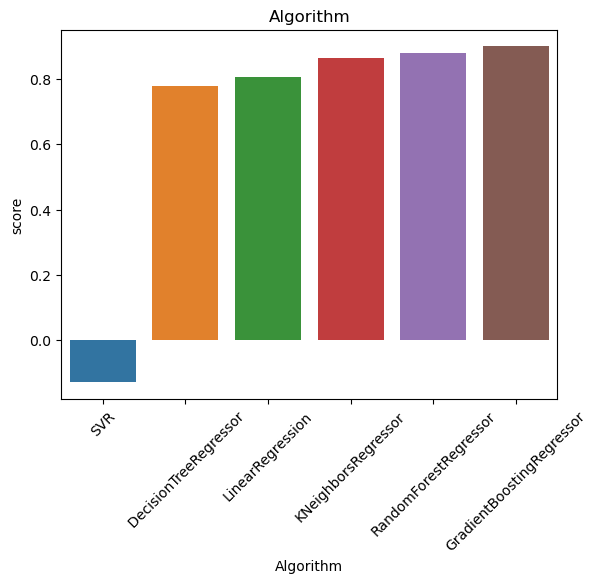

In [36]:
sns.barplot(x='Algorithm', y='score', data=algo)
plt.xticks(rotation=45)
plt.title('Algorithm')
plt.show()

In [37]:
param = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV( GB, param, cv=5)
grid.fit(x_train, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [38]:
model= GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth    = 3,
    n_estimators = 100
)


In [39]:
model.fit(x_train, y_train)
pred= model.predict(x_test)
pred_train=model.predict(x_train)

print('r2_score :', r2_score(y_test, pred))
print("r2_score on training date", r2_score(y_train, pred_train)*100)
print("Mean absolute error", mean_absolute_error (y_test, pred))
print("Root mean squared error", np.sqrt(mean_squared_error (y_test, pred)))


r2_score : 0.901669582794596
r2_score on training date 87.4203909461278
Mean absolute error 2487.046194146369
Root mean squared error 4250.742340013595


In [40]:
GBR = GradientBoostingRegressor (** grid.best_params_)

In [41]:
GBR.fit(x,y)

GradientBoostingRegressor(learning_rate=0.05)

In [42]:
import joblib

In [43]:
joblib.dump(model , 'cost_insurance_file.pkl')

['cost_insurance_file.pkl']